In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

plt.style.use('ggplot')
sns.set_palette("husl")

In [9]:
DATASET_PATH = r"D:/TTNT/heart.csv"

In [10]:
df = pd.read_csv(DATASET_PATH)

print(f"Kích thước: {df.shape[0]} hàng x {df.shape[1]} cột")
df.head()

Kích thước: 303 hàng x 14 cột


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [13]:
target_counts = df['target'].value_counts()
print(f"Không có bệnh tim: {target_counts[0]} người ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Có bệnh tim: {target_counts[1]} người ({target_counts[1]/len(df)*100:.1f}%)")

Không có bệnh tim: 138 người (45.5%)
Có bệnh tim: 165 người (54.5%)


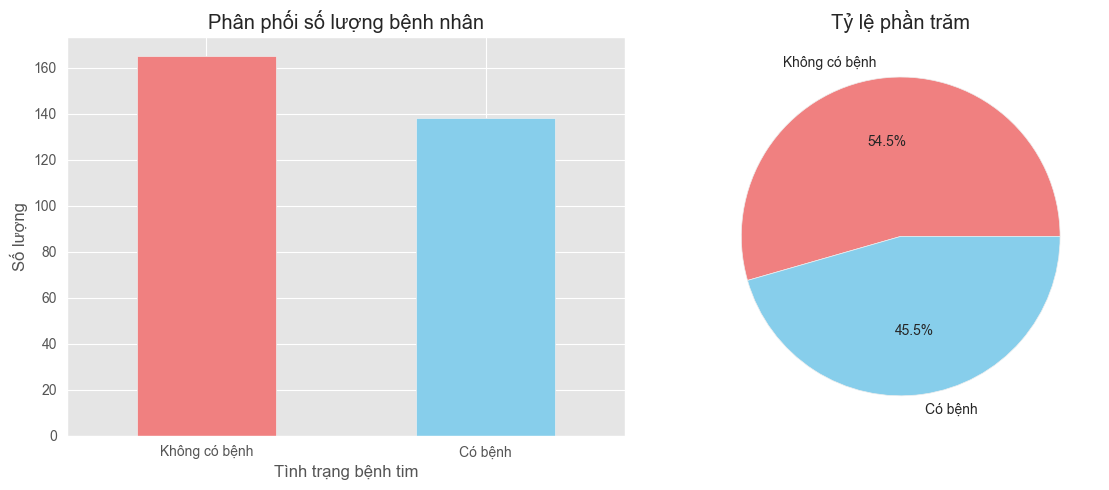

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
target_counts.plot(kind='bar', ax=ax1, color=['lightcoral', 'skyblue'])
ax1.set_title('Phân phối số lượng bệnh nhân')
ax1.set_xlabel('Tình trạng bệnh tim')
ax1.set_xticklabels(['Không có bệnh', 'Có bệnh'], rotation=0)
ax1.set_ylabel('Số lượng')
ax2.pie(target_counts.values, labels=['Không có bệnh', 'Có bệnh'],
autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
ax2.set_title('Tỷ lệ phần trăm')
plt.tight_layout()
plt.show()

C:\Users\HOMIE PC\AppData\Local\Temp\ipykernel_5480\1187916262.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Không', 'Có'])
C:\Users\HOMIE PC\AppData\Local\Temp\ipykernel_5480\1187916262.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Không', 'Có'])
C:\Users\HOMIE PC\AppData\Local\Temp\ipykernel_5480\1187916262.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Không', 'Có'])
C:\Users\HOMIE PC\AppData\Local\Temp\ipykernel_5480\1187916262.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Không', 'Có'])
C:\Users\HOMIE PC\AppData\Local\Temp\ipy

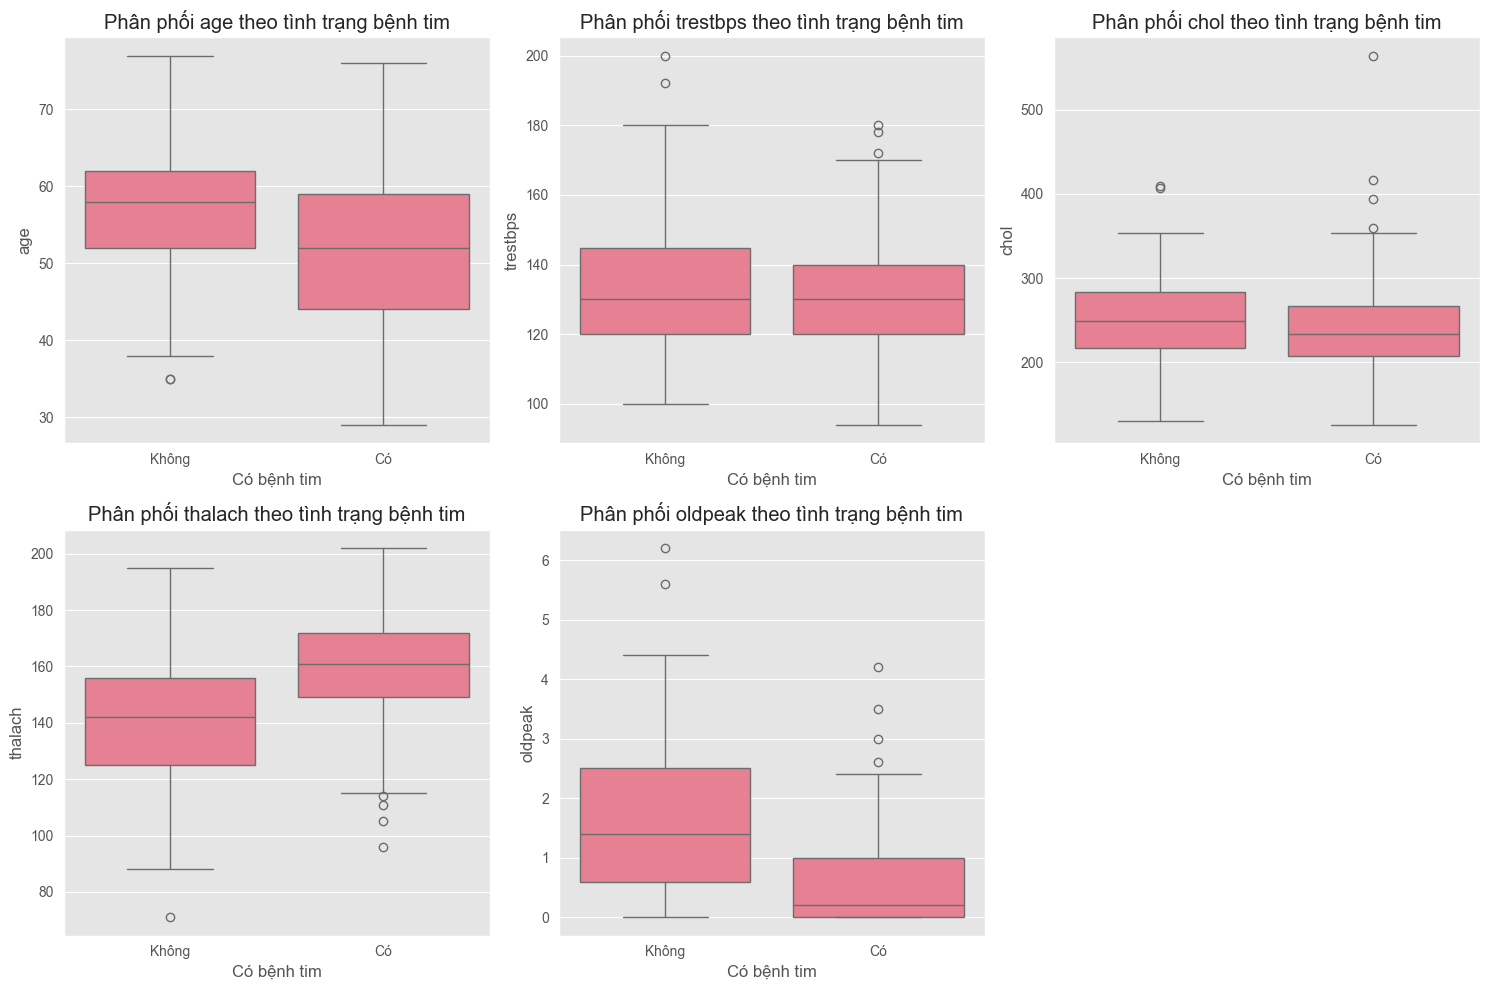

In [15]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for i, feature in enumerate(continuous_features):
    sns.boxplot(data=df, x='target', y=feature, ax=axes[i])
    axes[i].set_title(f'Phân phối {feature} theo tình trạng bệnh tim')
    axes[i].set_xlabel('Có bệnh tim')
    axes[i].set_xticklabels(['Không', 'Có'])
axes[5].set_visible(False)
plt.tight_layout()
plt.show()

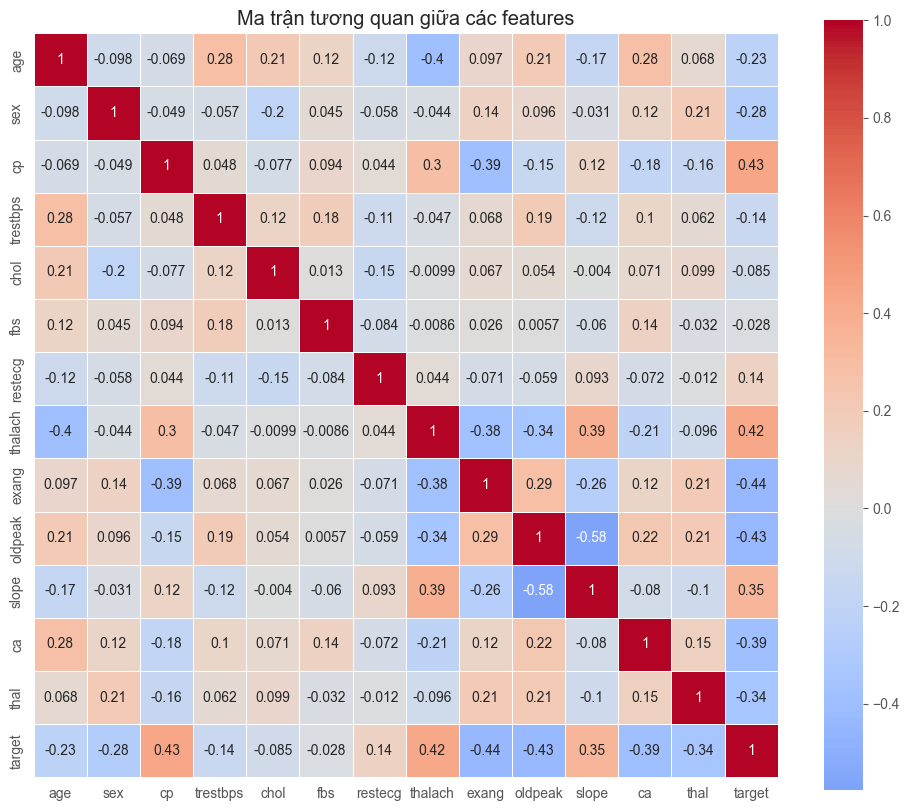

TƯƠNG QUAN VỚI BIẾN MỤC TIÊU:
cp: 0.434
thalach: 0.422
slope: 0.346
restecg: 0.137
fbs: -0.028
chol: -0.085
trestbps: -0.145
age: -0.225
sex: -0.281
thal: -0.344
ca: -0.392
oldpeak: -0.431
exang: -0.437


In [16]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
square=True, linewidths=0.5)
plt.title('Ma trận tương quan giữa các features')
plt.show()
print("TƯƠNG QUAN VỚI BIẾN MỤC TIÊU:")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
for feature, corr in target_corr.items():
    if feature != 'target':
        print(f"{feature}: {corr:.3f}")

In [ ]:
#Tiền xử lý dữ liệu

In [50]:
import joblib

In [17]:
X = df.drop('target', axis=1)
y = df['target']
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (303, 13)
Target shape: (303,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape[0]} mẫu")
print(f"Testing set: {X_test.shape[0]} mẫu")

Training set: 242 mẫu
Testing set: 61 mẫu


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
print("Mean (trung bình):", X_train_scaled.mean().round(6))
print("Std (độ lệch chuẩn):", X_train_scaled.std().round(6))


Mean (trung bình): age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol       -0.0
fbs        -0.0
restecg     0.0
thalach    -0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
dtype: float64
Std (độ lệch chuẩn): age         1.002073
sex         1.002073
cp          1.002073
trestbps    1.002073
chol        1.002073
fbs         1.002073
restecg     1.002073
thalach     1.002073
exang       1.002073
oldpeak     1.002073
slope       1.002073
ca          1.002073
thal        1.002073
dtype: float64


In [77]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
new_scaler = StandardScaler()
new_scaler.fit(df[continuous_features])

StandardScaler()

In [80]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR)))
outliers_count_per_feature = outliers_count_specified.sum()
print(outliers_count_per_feature)

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


In [81]:
joblib.dump(new_scaler, "scaler.pkl")

['scaler.pkl']

In [55]:
#Xây dựng mô hình Machine Learning
#Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [24]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)
lr_train_acc = accuracy_score(y_train, y_pred_lr_train)
lr_test_acc = accuracy_score(y_test, y_pred_lr_test)

In [25]:
from sklearn.model_selection import cross_val_score
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print(f"Training Accuracy: {lr_train_acc:.4f} ({lr_train_acc:.1%})")
print(f"Testing Accuracy: {lr_test_acc:.4f} ({lr_test_acc:.1%})")
print(f"Cross-Validation: {lr_cv_scores.mean():.4f} ± {lr_cv_scores.std():.4f}")

Training Accuracy: 0.8430 (84.3%)
Testing Accuracy: 0.8033 (80.3%)
Cross-Validation: 0.8309 ± 0.0409


In [26]:
#Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [28]:
dt_model = DecisionTreeClassifier(
random_state=42,
max_depth=5, # Giới hạn độ sâu
min_samples_split=10, # Tối thiểu samples để split
min_samples_leaf=5 # Tối thiểu samples trong leaf
)

In [29]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [30]:
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

In [31]:
dt_train_acc = accuracy_score(y_train, y_pred_dt_train)
dt_test_acc = accuracy_score(y_test, y_pred_dt_test)

In [32]:
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)

In [33]:
print(f"Training Accuracy: {dt_train_acc:.4f} ({dt_train_acc:.1%})")
print(f"Testing Accuracy: {dt_test_acc:.4f} ({dt_test_acc:.1%})")
print(f"Cross-Validation: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")

Training Accuracy: 0.8760 (87.6%)
Testing Accuracy: 0.7541 (75.4%)
Cross-Validation: 0.7608 ± 0.0681


In [ ]:
#svm

In [34]:
from sklearn.svm import SVC

In [35]:
svm_model = SVC(
kernel='rbf', # Radial Basis Function kernel
C=1.0, # Regularization parameter
gamma='scale', # Kernel coefficient
random_state=42,
probability=True # Enable probability estimates
)

In [36]:
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [38]:
y_pred_svm_train = svm_model.predict(X_train_scaled)
y_pred_svm_test = svm_model.predict(X_test_scaled)

In [39]:
svm_train_acc = accuracy_score(y_train, y_pred_svm_train)
svm_test_acc = accuracy_score(y_test, y_pred_svm_test)
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)

In [40]:
print(f"Training Accuracy: {svm_train_acc:.4f} ({svm_train_acc:.1%})")
print(f"Testing Accuracy: {svm_test_acc:.4f} ({svm_test_acc:.1%})")
print(f"Cross-Validation: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}")

Training Accuracy: 0.9132 (91.3%)
Testing Accuracy: 0.8197 (82.0%)
Cross-Validation: 0.8020 ± 0.0388


In [41]:
comparison_data = {
'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
'Training Accuracy': [f'{lr_train_acc:.4f} ({lr_train_acc:.1%})',
f'{dt_train_acc:.4f} ({dt_train_acc:.1%})',
f'{svm_train_acc:.4f} ({svm_train_acc:.1%})'],
'Testing Accuracy': [f'{lr_test_acc:.4f} ({lr_test_acc:.1%})',
f'{dt_test_acc:.4f} ({dt_test_acc:.1%})',
f'{svm_test_acc:.4f} ({svm_test_acc:.1%})']
}
df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

              Model Training Accuracy Testing Accuracy
Logistic Regression    0.8430 (84.3%)   0.8033 (80.3%)
      Decision Tree    0.8760 (87.6%)   0.7541 (75.4%)
                SVM    0.9132 (91.3%)   0.8197 (82.0%)


In [42]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
        xticklabels=["Pred 0", "Pred 1"],
        yticklabels=["True 0", "True 1"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

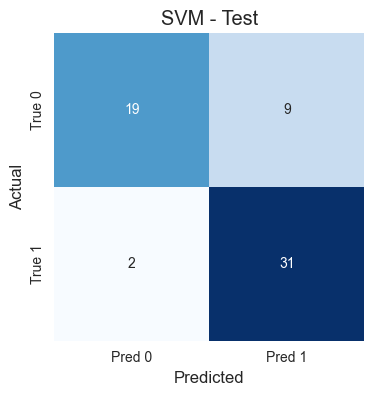

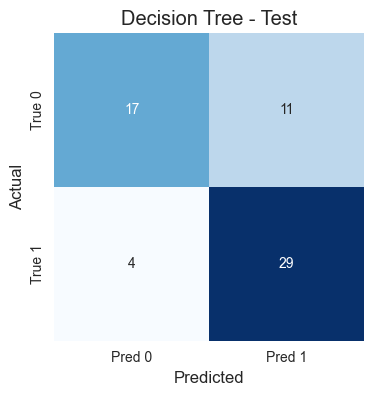

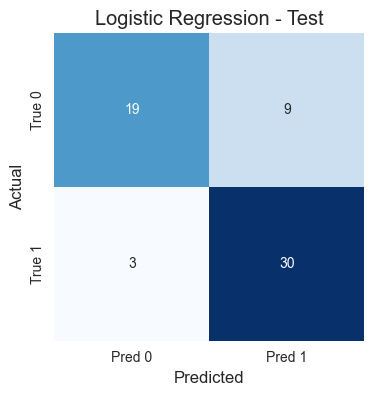

In [43]:
plot_conf_matrix(y_test, y_pred_svm_test, "SVM - Test")
plot_conf_matrix(y_test, y_pred_dt_test, "Decision Tree - Test")
plot_conf_matrix(y_test, y_pred_lr_test, "Logistic Regression - Test")

In [44]:
import joblib

In [69]:
joblib.dump(svm_model, 'svm_heart_disease_model.pkl')
joblib.dump(dt_model, 'dt_heart_disease_model.pkl')
joblib.dump(lr_model, 'lr_heart_disease_model.pkl')

['lr_heart_disease_model.pkl']

In [ ]:
#ứng dụng

In [90]:
import numpy as np
import joblib

In [91]:
svm_model = joblib.load("svm_heart_disease_model.pkl")
scaler = joblib.load("scaler.pkl")

In [94]:
# Các cột continuous
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Danh sách toàn bộ feature theo thứ tự train
all_features = ['age','sex','cp','trestbps','chol','fbs','restecg',
                'thalach','exang','oldpeak','slope','ca','thal']

def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg,
                          thalach, exang, oldpeak, slope, ca, thal):
    """
    Hàm dự đoán bệnh tim cho một bệnh nhân mới
    """

    # 1. Tạo DataFrame với đủ 13 cột
    input_df = pd.DataFrame([{
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal
    }])[all_features]

    # 2. Chỉ scale 5 cột continuous, giữ nguyên các cột khác
    input_df[continuous_features] = scaler.transform(input_df[continuous_features])

    # 3. Dự đoán với đủ 13 feature
    prediction = svm_model.predict(input_df)[0]
    probability = svm_model.predict_proba(input_df)[0]

    result = {
        'prediction': 'Có nguy cơ bệnh tim' if prediction == 1 else 'Không có nguy cơ bệnh tim',
        'probability_no_disease': float(probability[0]),
        'probability_disease': float(probability[1]),
        'confidence': float(max(probability))
    }
    return result


# Ví dụ bệnh nhân
example_patient = {
    'age': 63, 'sex': 1, 'cp': 3, 'trestbps': 145, 'chol': 233,
    'fbs': 1, 'restecg': 0, 'thalach': 150, 'exang': 0,
    'oldpeak': 2.3, 'slope': 0, 'ca': 0, 'thal': 1
}

prediction_result = predict_heart_disease(**example_patient)

print("\nDỰ ĐOÁN CHO BỆNH NHÂN MỚI:")
print(prediction_result)


DỰ ĐOÁN CHO BỆNH NHÂN MỚI:
{'prediction': 'Có nguy cơ bệnh tim', 'probability_no_disease': 0.22406259466770803, 'probability_disease': 0.7759374053322919, 'confidence': 0.7759374053322919}
